# Regresión lineal 
En este cuaderno, exploraremos el concepto de regresión lineal y su aplicación práctica mediante un ejemplo en Python. Para comenzar, el primer paso consistirá en la descarga de datos y comprender su contenido.

## Importa las librerias necesarias

In [15]:
# Manipulación de datos
import numpy as np
import pandas as pd
# Visualización
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', context='notebook')

# Modelos
## Preparar datos
# https://scikit-learn.org/stable/ 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Regresión lineal
from sklearn.linear_model import LinearRegression
## Evaluación
from sklearn.metrics import mean_squared_error

## Importando datos
en este caso se toman los datos del modulo de sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
se toman los datos de la flor iris.


otros datos que se pueden obtener
#sklearn.datasets.load_boston(*, return_X_y=False)[source]
#sklearn.datasets.load_breast_cancer(*, return_X_y=False, as_frame=False)[source]
#sklearn.datasets.load_diabetes(*, return_X_y=False, as_frame=False)[source]
#sklearn.datasets.load_digits(*, n_class=10, return_X_y=False, as_frame=False)[source]

In [2]:

iris_dataset = load_iris()



# se crea un dataframe con los datos de la flor iris

df_iris=pd.DataFrame()
df_iris["sepal length in cm"]=iris_dataset.data[:,0]
df_iris["sepal width in cm"]=iris_dataset.data[:,1]
df_iris["petal length in cm"]=iris_dataset.data[:,2]
df_iris["petal width in cm"]=iris_dataset.data[:,3]
df_iris["target"]=iris_dataset.target
dict={0:'setosa', 1:'versicolor', 2:'virginica'}
df_iris["target_name"]=df_iris["target"]
df_iris.replace({"target_name": dict},inplace=True)

df_iris

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Entendiendo los datos
Para entender los datos se hace un analisis Exploratorio de los Datos (EDA)


In [3]:
# Visualización
list(df_iris.columns)

['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'target',
 'target_name']

In [10]:
# Información general del dataframe, para saber si hay datos faltantes, el tipo de dato de cada columna, etc.
df_iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   target              150 non-null    int32  
 5   target_name         150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [11]:
# Estadísticas descriptivas de las variables numéricas
df_iris.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# Estadísticas descriptivas de las variables categóricas
df_iris.describe(include='object')


,target_name
count,150
unique,3
top,setosa
freq,50


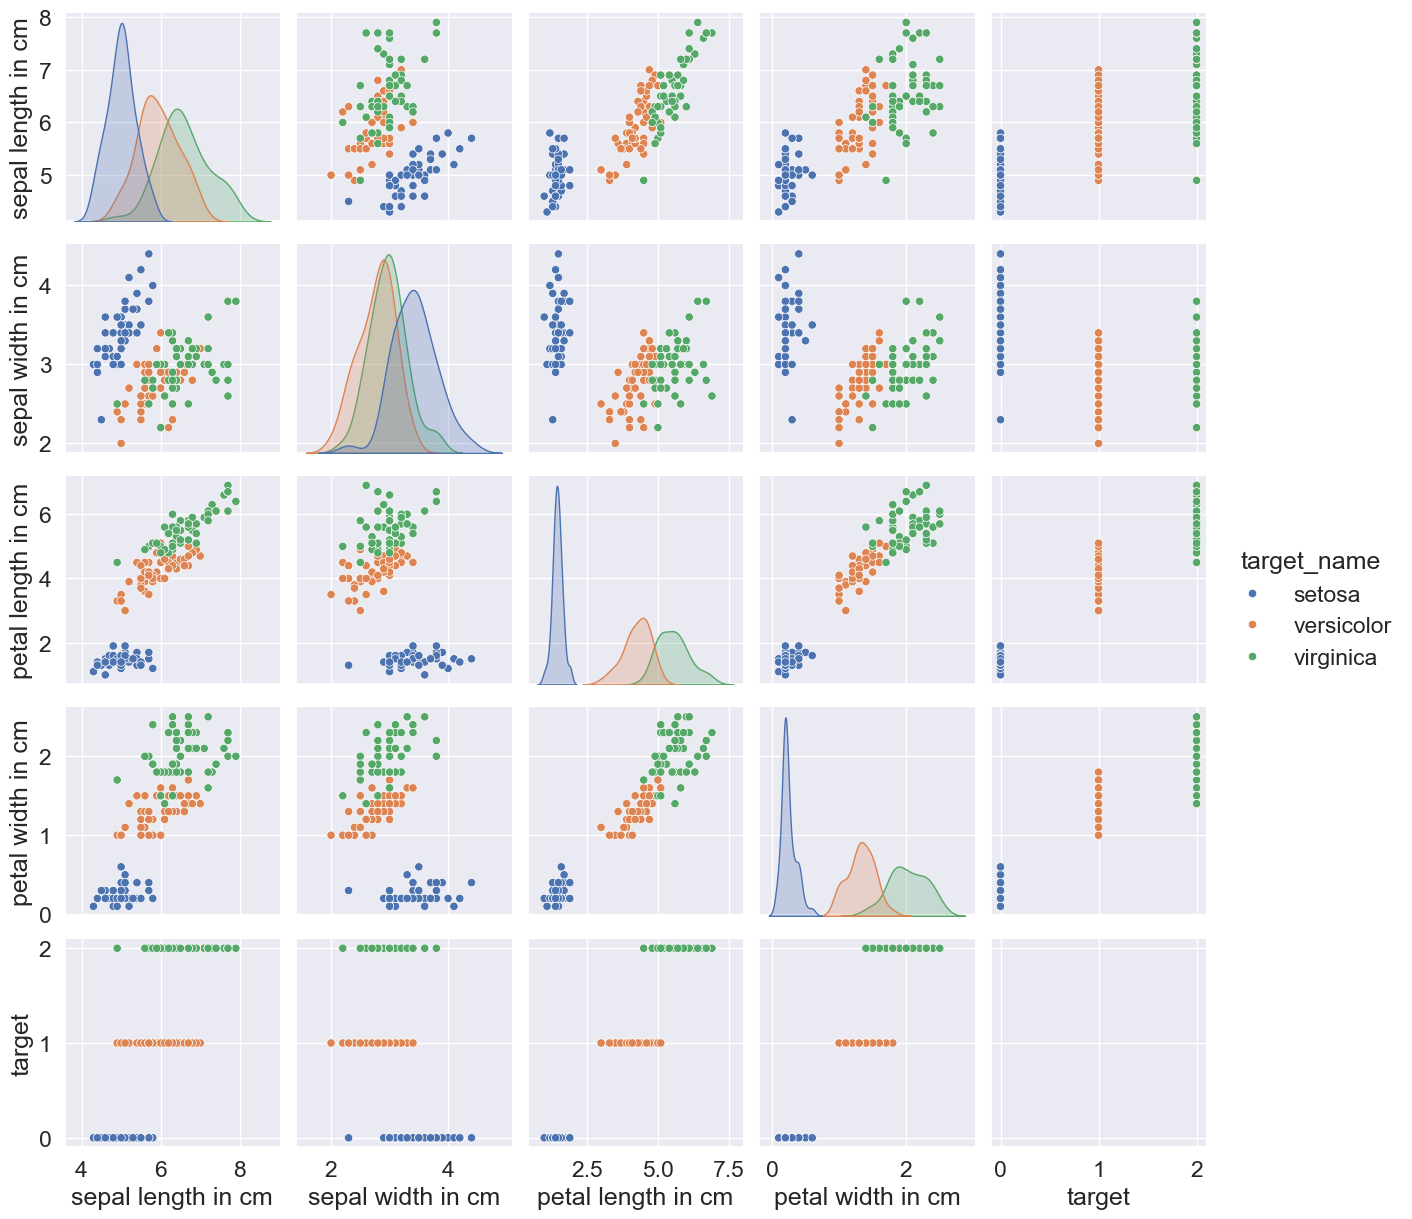

In [14]:
# Se visualizan las relaciones entre las variables numéricas, y sus distribuciones
# se colorea por especie
sns.pairplot(df_iris, hue='target_name', height=2.5)
#sns.pairplot(df_iris, height=2.5)
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

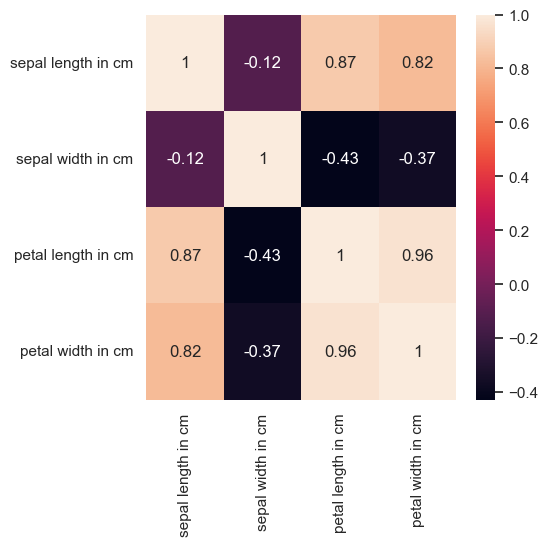

In [19]:
# Se visualizan las relaciones entre las variables numéricas con Heatmap
cols=['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm']
# Matriz de correlación
cm = np.corrcoef(df_iris[cols].values.T )
sns.set_theme(font_scale=1)
plt.figure(figsize=(5,5))
# Heatmap de la matriz de correlación
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)
plt.show()

Se puede concluir que las variables de Petal Legth y petal width estan altamente correlacionadas, vamos a utilizar estas dos variables para mostrar el ejemplo de regressión lineal simple

## Creando modelo con scikit-learn

In [21]:
# Separación de datos, x y y
#datos de entrada o variable independiente
X = df_iris['petal width in cm'].values.reshape(-1,1) #-1 es para poner el mismo número de filas originale
#datos de salida, o variable dependiente
y = df_iris['petal length in cm'].values.reshape(-1,1)

X.shape, y.shape


((150, 1), (150, 1))

In [22]:
# Preparar los datos

#normalizar datos, vamos a entrenar un modelo de regresión lineal

estandar_x = StandardScaler()
estandar_y = StandardScaler()

X_std = estandar_x.fit_transform(X)
y_std = estandar_y.fit_transform(y)

In [23]:
# Entrenamiento
# Se crea el modelo de regresión lineal
regresor = LinearRegression()
# Se entrena el modelo
regresor.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

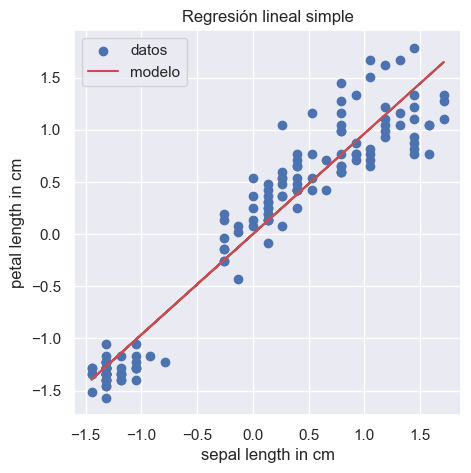

In [28]:
# visualización del modelo
plt.figure(figsize=(5,5))
# datos
plt.scatter(X_std,y_std)
# modelo
plt.plot(X_std,regresor.predict(X_std), color='r')
# etiquetas
plt.ylabel("petal length in cm")
plt.xlabel("petal width in cm")
plt.title("Regresión lineal simple")
# legenda
plt.legend(['datos','modelo'])
plt.show()

In [30]:
# Evaluación
# Se hace la predicción
y_pred = regresor.predict(X_std)
# Se calcula el error
error = mean_squared_error(y_std, y_pred)
# Se desnormaliza la predicción
y_pred_desnorm = estandar_y.inverse_transform(y_pred)
# Se calcula el error
error_desnorm = mean_squared_error(y, y_pred_desnorm)
print(f'Error normalizado: {error:.2f}')
print(f'Error desnormalizado: {error_desnorm:.2f}')


Error normalizado: 0.07
Error desnormalizado: 0.23


In [34]:
# calcular r2
r2 = regresor.score(X_std, y_std)
r2

0.9271098389904927

In [33]:
# calculo de la pendiente y la intersección
pendiente = regresor.coef_[0]
interseccion = regresor.intercept_
print(f'Pendiente: {pendiente[0]:.2f}') 
print(f'Intersección: {interseccion[0]:.2f}')


Pendiente: 0.96
Intersección: 0.00


## Generando predicción con el modelo

In [32]:
# Predicción
# se quiere saber la longitud del petalo de una flor con ancho de petalo de 2cm
petal_width = 2 #cm
petal_width_std = estandar_x.transform(np.array([petal_width]).reshape(-1,1))
petal_length_std = regresor.predict(petal_width_std)
#se aplica transformada inversa
print("La longitud del petalo de una flor con ancho de petalo 2cm es de ",estandar_y.inverse_transform( petal_length_std)[0])

La longitud del petalo de una flor con ancho de petalo 2cm es de  [5.54343902]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4be8b6-6c74-4684-9aa7-992eab9b3282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>